In [1]:
#!pip install --upgrade pip
#!pip install matplotlib

# Synthetic Data generation with Synthetic Data Vault (SDV)
<img src="images/SDV.png" width="200" align="left"/>

The Synthetic Data Vault (SDV) provides a set of libraries that to generate synthetic data based on single, multi tables and timeseries based datasets. It is one of the popular frameworks and this is based on Auto regressive method.

References

- [SDV](https://sdv.dev/SDV/#:~:text=The%20Synthetic%20Data%20Vault%20(SDV,properties%20as%20the%20original%20dataset)
- [SDV Github](https://github.com/sdv-dev/SDV)
- [Reference paper](https://dai.lids.mit.edu/wp-content/uploads/2018/03/SDV.pdf)


---

In [2]:
#!pip install sdv

In [3]:
%load_ext autoreload
%autoreload 2
from utils import *

In [4]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
engine_data = get_engine_data()
train_test_sample_size = 10000
df = engine_data.sample(train_test_sample_size)
df

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
45366   42.0008    0.8410     100.0  445.00  550.09  1350.92  1134.22   3.91   
16537   35.0072    0.8400     100.0  449.44  555.37  1373.31  1130.58   5.48   
40795   10.0075    0.2514     100.0  489.05  605.72  1513.05  1326.76  10.52   
21864   42.0015    0.8400     100.0  445.00  549.84  1362.07  1122.45   3.91   
33878   25.0006    0.6200      60.0  462.54  537.31  1259.27  1044.60   7.05   
...         ...       ...       ...     ...     ...      ...      ...    ...   
23806   42.0040    0.8400     100.0  445.00  550.20  1361.51  1128.48   3.91   
26489   10.0010    0.2500     100.0  489.05  604.24  1494.15  1303.69  10.52   
25939   35.0028    0.8402     100.0  449.44  555.45  1367.13  1125.75   5.48   
40464   10.0034    0.2500     100.0  489.05  604.89  1499.59  1309.23  10.52   
37944   20.0063    0.7008     100.0  491.19  607.43  1481.94  1252.13   9.35   

          s6      s7  ...     s12      s13      s14      s15   s16  s17   s18  \
45366   5.72  139.18  ...  130.20  2387.74  8073.92   9.3972  0.02  331  2212   
16537   8.00  194.55  ...  183.34  2388.03  8066.63   9.3301  0.02  335  2223   
40795  15.50  393.08  ...  370.20  2388.37  8117.69   8.7585  0.03  371  2319   
21864   5.71  138.47  ...  130.80  2387.72  8076.63   9.3777  0.02  330  2212   
33878   9.03  175.33  ...  164.66  2028.32  7881.11  10.9215  0.02  307  1915   
...      ...     ...  ...     ...      ...      ...      ...   ...  ...   ...   
23806   5.72  138.42  ...  130.57  2387.86  8082.36   9.3905  0.02  333  2212   
26489  15.49  395.48  ...  371.92  2387.97  8138.00   8.6470  0.03  367  2319   
25939   8.00  194.83  ...  183.35  2388.01  8069.70   9.2837  0.02  333  2223   
40464  15.49  394.91  ...  371.55  2388.18  8130.64   8.6638  0.03  370  2319   
37944  13.65  334.75  ...  314.72  2388.16  8071.27   9.2224  0.02  365  2324   

          s19    s20      s21  
45366  100.00  10.70   6.3739  
16537  100.00  14.72   8.9054  
40795  100.00  28.38  16.9894  
21864  100.00  10.46   6.3620  
33878   84.93  13.93   8.5508  
...       ...    ...      ...  
23806  100.00  10.60   6.3134  
26489  100.00  28.75  17.2660  
25939  100.00  15.00   8.9445  
40464  100.00  28.51  16.9311  
37944  100.00  24.57  14.6432  

[10000 rows x 24 columns]

### Prepare dataset for training

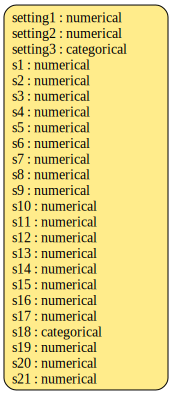

In [6]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata.visualize()

## Gaussian Copula

Gaussian Copula attempts to model variables that have complex dependencies as joint distributions using a copula function. This increases the modeling accuracy for tabular data structures with variables of non-standard marginal distributions. Specifically copula helps to decompose a multivariate distribution into individual marginal distributions and the copula (latin for link).

<img src="images/GC.png" width="600" align="left"/>

In [7]:
# Initialize the GaussianCopulaSynthesizer
synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=None
)

/opt/conda/lib/python3.10/site-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [8]:
# Fit the synthesizer to the dataset
synthesizer.fit(df)

In [9]:
%%time
# Generate synthetic data
sample_size = 100
synthetic_data = synthesizer.sample(sample_size).to_numpy()

synthetic_df = pd.DataFrame(synthetic_data, columns=reqd_cols)
synthetic_df

CPU times: user 91.7 ms, sys: 3.94 ms, total: 95.7 ms
Wall time: 95.2 ms


setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0    31.1272    0.8408     100.0  452.62  537.78  1292.76  1068.50   9.93   
1    41.4144    0.8420      60.0  445.11  535.90  1249.29  1033.93   5.51   
2    12.7325    0.7531     100.0  475.76  608.28  1495.06  1326.79  10.62   
3     2.1912    0.0612     100.0  507.18  614.69  1529.30  1386.14  13.72   
4    24.2552    0.3134     100.0  459.25  595.96  1444.69  1289.94   7.45   
..       ...       ...       ...     ...     ...      ...      ...    ...   
95    2.8457    0.0002     100.0  502.46  643.82  1607.06  1435.32  13.52   
96   35.1034    0.7834     100.0  448.93  582.09  1487.37  1207.75   6.26   
97   18.3474    0.1148     100.0  465.00  631.53  1547.06  1384.71  12.17   
98   36.2326    0.8415     100.0  447.60  538.69  1324.52  1118.71   5.61   
99   17.2260    0.8075     100.0  472.05  541.89  1321.14  1088.54   9.77   

       s6      s7  ...     s12      s13      s14      s15   s16    s17  \
0    7.79  154.05  ...  145.07  2027.61  7882.17  10.5219  0.02  315.0   
1    5.89  137.02  ...  129.47  2027.61  7876.04  10.9945  0.02  305.0   
2   14.33  332.77  ...  306.85  2390.32  8167.18   8.7618  0.02  363.0   
3   14.17  481.89  ...  456.12  2027.61  8239.10   8.5450  0.03  378.0   
4    7.32  264.48  ...  224.03  2390.32  8212.04   8.9559  0.02  358.0   
..    ...     ...  ...     ...      ...      ...      ...   ...    ...   
95  10.24  532.19  ...  499.18  2390.32  8252.23   8.3793  0.03  397.0   
96   5.86  177.07  ...  157.25  2390.32  8231.44   8.7937  0.02  363.0   
97   8.21  306.89  ...  288.82  2390.32  8167.30   8.7894  0.02  385.0   
98   6.99  143.73  ...  135.51  2390.32  8159.95   9.7532  0.02  325.0   
99  12.57  209.24  ...  190.38  2027.61  7872.23  10.3549  0.02  320.0   

       s18     s19    s20      s21  
0   1915.0  100.00  12.25   7.4087  
1   2212.0   84.93  10.18   6.1482  
2   1915.0  100.00  25.26  16.2842  
3   2319.0  100.00  36.25  22.1838  
4   2212.0  100.00  21.11  11.2210  
..     ...     ...    ...      ...  
95  1915.0  100.00  38.00  23.0528  
96  2319.0  100.00  13.91   7.9194  
97  1915.0  100.00  27.43  16.3291  
98  2212.0  100.00  10.92   6.4650  
99  2324.0  100.00  16.38   9.6957  

[100 rows x 24 columns]

In [10]:
from pathlib import Path
metrics_dir = 'metrics'
algo_name = 'gc'
original_df_file = f'{metrics_dir}/original_df.csv'
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'

if Path(original_df_file).is_file():
    original_df = pd.read_csv(original_df_file)
else:
    original_df = engine_data.sample(len(synthetic_df))
    original_df = original_df.reset_index(inplace=False,drop=True)
    original_df.to_csv(original_df_file, index=False,header=True) 

synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 
original_df

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0    34.9983    0.8400     100.0  449.44  555.78  1363.97  1125.39   5.48   
1    24.9984    0.6200      60.0  462.54  537.01  1256.09  1045.64   7.05   
2    42.0071    0.8401     100.0  445.00  549.81  1352.27  1124.99   3.91   
3     0.0020    0.0000     100.0  518.67  642.81  1589.90  1407.62  14.62   
4     9.9989    0.2517     100.0  489.05  604.29  1496.64  1304.30  10.52   
..       ...       ...       ...     ...     ...      ...      ...    ...   
95   10.0075    0.2507     100.0  489.05  604.94  1499.84  1310.79  10.52   
96   35.0002    0.8404     100.0  449.44  555.52  1363.91  1129.15   5.48   
97   35.0048    0.8400     100.0  449.44  557.03  1376.97  1155.05   5.48   
98   10.0074    0.2517     100.0  489.05  604.93  1509.62  1315.22  10.52   
99   42.0065    0.8400     100.0  445.00  550.16  1352.17  1134.76   3.91   

       s6      s7  ...     s12      s13      s14      s15   s16  s17   s18  \
0    8.00  194.72  ...  182.94  2388.13  8073.91   9.3152  0.02  333  2223   
1    9.03  175.57  ...  165.18  2028.40  7886.30  10.9136  0.02  306  1915   
2    5.71  138.57  ...  130.77  2387.89  8080.70   9.3821  0.02  331  2212   
3   21.61  553.10  ...  521.52  2388.13  8138.29   8.4215  0.03  393  2388   
4   15.49  393.91  ...  371.99  2388.10  8139.17   8.6337  0.03  368  2319   
..    ...     ...  ...     ...      ...      ...      ...   ...  ...   ...   
95  15.49  394.34  ...  371.37  2388.16  8132.50   8.6452  0.03  369  2319   
96   8.00  195.68  ...  183.46  2388.07  8066.44   9.2779  0.02  332  2223   
97   8.01  194.01  ...  182.99  2389.65  8143.37   9.4200  0.02  338  2223   
98  15.49  394.45  ...  371.01  2388.19  8152.99   8.6958  0.03  370  2319   
99   5.72  138.88  ...  130.10  2387.93  8086.71   9.4216  0.02  334  2212   

       s19    s20      s21  
0   100.00  14.72   8.8547  
1    84.93  14.55   8.5935  
2   100.00  10.62   6.4156  
3   100.00  38.97  23.3654  
4   100.00  28.62  17.0607  
..     ...    ...      ...  
95  100.00  28.54  17.0885  
96  100.00  14.87   8.9074  
97  100.00  14.67   8.8234  
98  100.00  28.68  17.1613  
99  100.00  10.44   6.2058  

[100 rows x 24 columns]

In [11]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


Min        Max         Mean         Std
setting1     0.0000    42.0080    21.863409   14.095098
setting2     0.0000     0.8419     0.539277    0.307351
setting3    60.0000   100.0000    94.800000   13.452137
s1         445.0000   518.6700   476.265200   25.222571
s2         536.3100   643.2700   584.522100   36.014661
s3        1247.0600  1597.7700  1433.442300  102.663913
s4        1040.5100  1418.2100  1220.112700  115.103377
s5           3.9100    14.6200     8.486500    3.421230
s6           5.7100    21.6100    12.294100    5.165116
s7         137.9500   555.4200   301.459000  139.818840
s8        1915.1000  2388.2000  2243.457400  139.901365
s9        8001.7000  9107.0200  8570.571700  325.164306
s10          0.9400     1.3000     1.111900    0.128908
s11         36.3500    47.7800    43.326000    3.115025
s12        130.1000   523.1800   283.832800  131.869406
s13       2027.9300  2389.6500  2341.361200  120.961806
s14       7852.4400  8188.4900  8075.391200   81.441890
s15          8.3737    11.0145     9.257105    0.740894
s16          0.0200     0.0300     0.023900    0.004877
s17        305.0000   397.0000   351.950000   26.693585
s18       1915.0000  2388.0000  2243.380000  140.049833
s19         84.9300   100.0000    98.040900    5.068093
s20         10.4400    39.0400    22.088500    9.446593
s21          6.2058    23.4341    13.267902    5.669591


Synthetic stat


Min        Max         Mean         Std
setting1     0.1376    41.9496    19.447080   13.632633
setting2     0.0002     0.8420     0.521592    0.307358
setting3    60.0000   100.0000    96.000000   12.000000
s1         445.0000   517.7900   473.809500   23.579005
s2         535.9000   643.8200   581.819800   38.909755
s3        1245.8100  1607.0600  1438.770100  106.924448
s4        1032.9200  1435.3200  1237.368700  130.004142
s5           5.4900    14.6200     9.374600    2.877356
s6           5.7100    21.6100    11.297600    4.839442
s7         136.9900   551.7100   296.136000  135.738374
s8        1914.7700  2388.3300  2257.294400  137.655681
s9        7991.0200  9159.7600  8562.554900  352.167749
s10          0.9400     1.3000     1.086400    0.135348
s11         36.4200    48.1900    43.187000    3.362619
s12        129.4500   520.0700   276.169900  128.771703
s13       2027.6100  2390.3200  2201.710800  181.209858
s14       7848.5800  8252.6100  8106.341500  135.426891
s15          8.3776    11.0657     9.259560    0.720098
s16          0.0200     0.0300     0.020500    0.002179
s17        304.0000   397.0000   353.390000   28.107969
s18       1915.0000  2388.0000  2215.980000  146.896901
s19         84.9300   100.0000    98.794400    4.088389
s20         10.1800    39.1800    22.677100    9.953137
s21          6.1461    23.5306    13.638848    6.052878


Comparison:


KLD Mean    WD Mean
Comparison  3.842384  18.005557

In [12]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 0.015635844320058823},
 {'setting2': 0.0016388898948207498},
 {'setting3': 0.01604831963777542},
 {'s1': 0.009035035967826843},
 {'s2': 0.009085461497306824},
 {'s3': 0.0030321888625621796},
 {'s4': 0.027224399149417877},
 {'s5': 0.06014908850193024},
 {'s6': 0.022488050162792206},
 {'s7': 0.0015776082873344421},
 {'s8': 0.0051012225449085236},
 {'s9': 0.0070177167654037476},
 {'s10': 0.021824873983860016},
 {'s11': 0.0071453675627708435},
 {'s12': 0.0022276751697063446},
 {'s13': 0.8777045607566833},
 {'s14': 0.445509135723114},
 {'s15': 0.0008007995784282684},
 {'s16': 0.6459188461303711},
 {'s17': 0.004200335592031479},
 {'s18': 0.0212995745241642},
 {'s19': 0.051131367683410645},
 {'s20': 0.004747658967971802},
 {'s21': 0.006591223180294037}]

In [13]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.2, 0.03638428787491733)},
 {'setting2': (0.16, 0.1548386665118475)},
 {'setting3': (0.03, 0.9999999999962054)},
 {'s1': (0.22, 0.015577131622877688)},
 {'s2': (0.2, 0.03638428787491733)},
 {'s3': (0.18, 0.07822115797841851)},
 {'s4': (0.21, 0.024055802841094577)},
 {'s5': (0.33, 3.211428734211389e-05)},
 {'s6': (0.24, 0.0061340334218580265)},
 {'s7': (0.15, 0.21117008625127576)},
 {'s8': (0.32, 6.281176788972264e-05)},
 {'s9': (0.16, 0.1548386665118475)},
 {'s10': (0.32, 6.281176788972264e-05)},
 {'s11': (0.23, 0.009878183186176536)},
 {'s12': (0.16, 0.1548386665118475)},
 {'s13': (0.52, 1.070075869779788e-12)},
 {'s14': (0.49, 2.948425133635738e-11)},
 {'s15': (0.26, 0.002219935934558366)},
 {'s16': (0.34, 1.605714367105695e-05)},
 {'s17': (0.18, 0.07822115797841851)},
 {'s18': (0.1, 0.7020569828664881)},
 {'s19': (0.05, 0.9996892272702655)},
 {'s20': (0.18, 0.07822115797841851)},
 {'s21': (0.18, 0.07822115797841851)}]

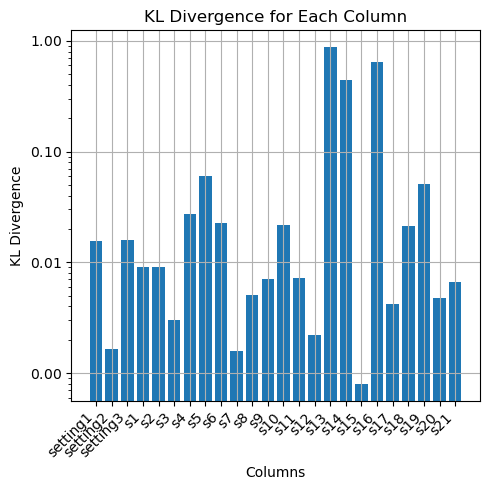

In [14]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

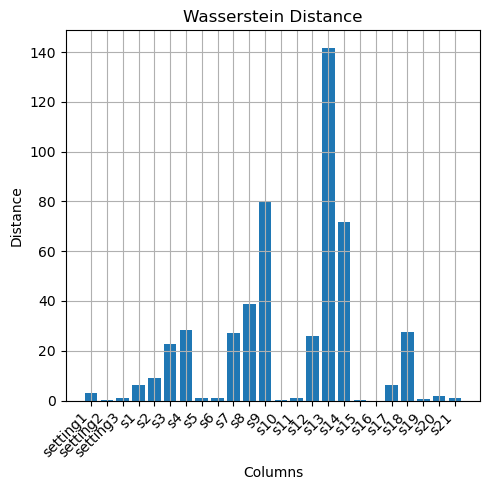

In [15]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

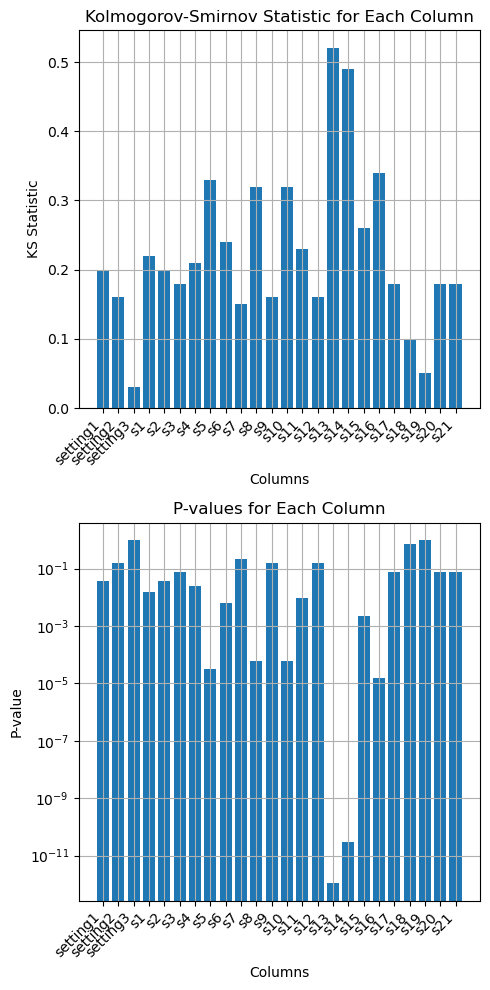

In [16]:
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

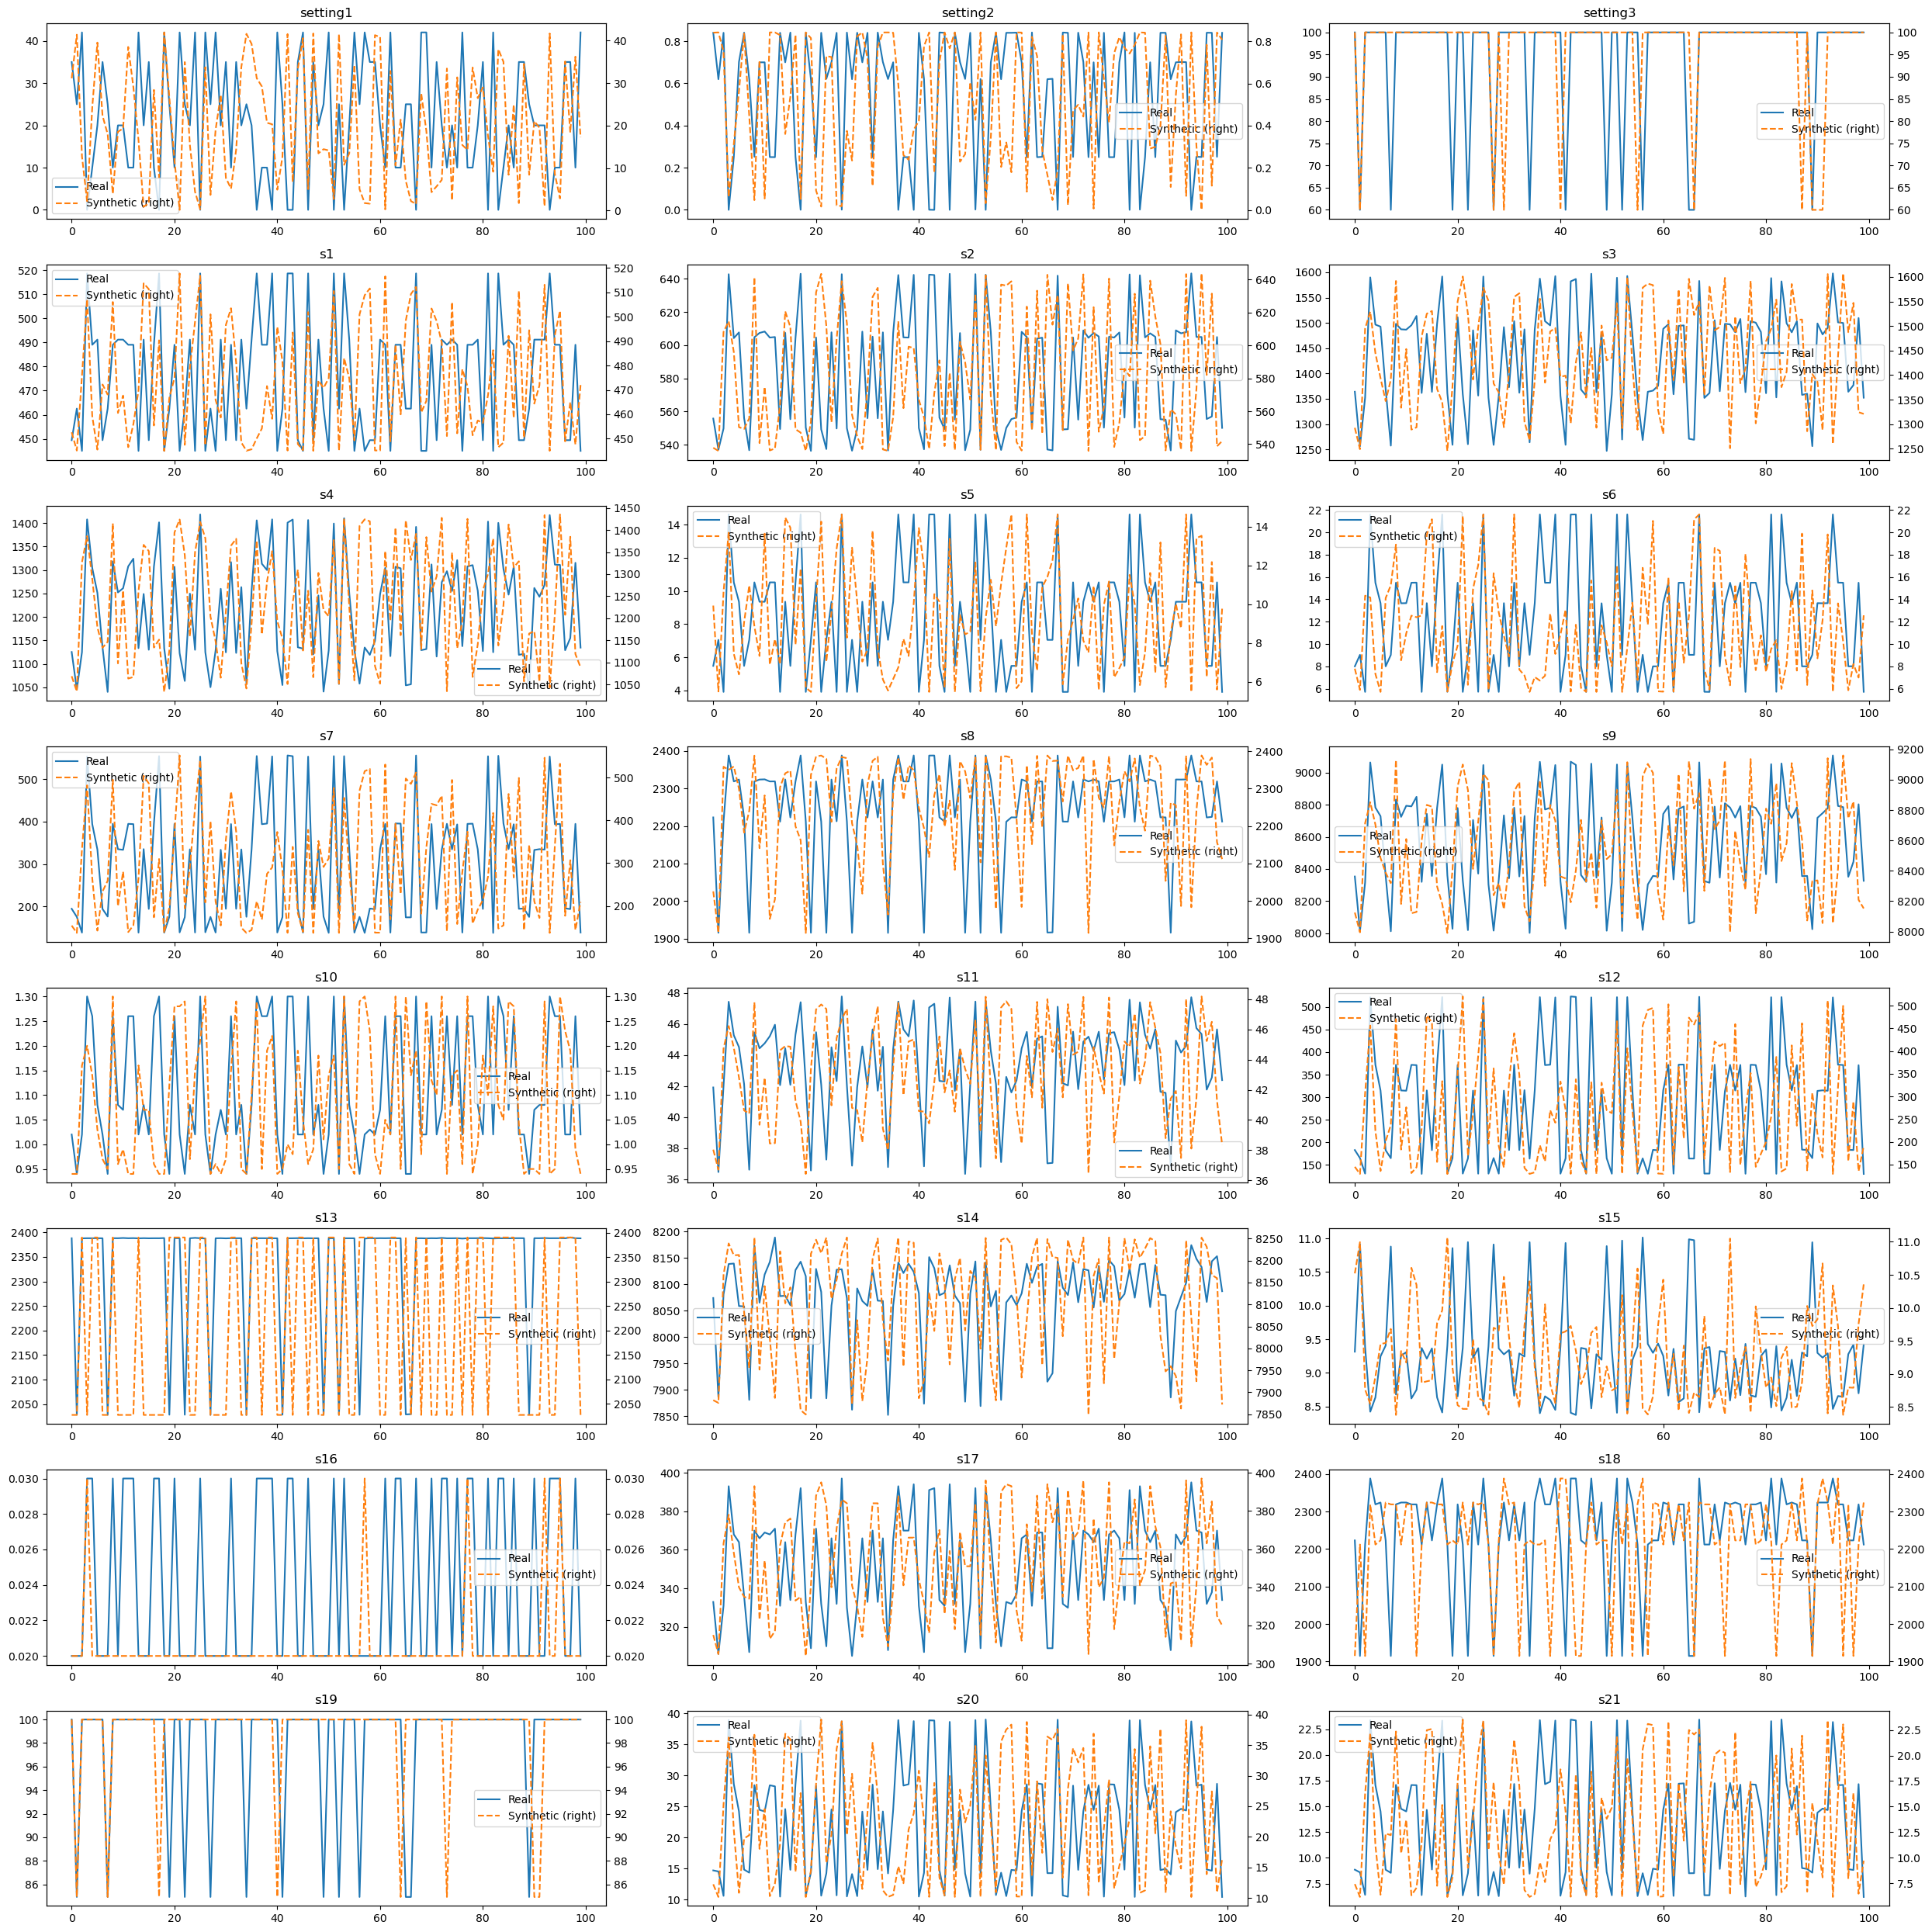

In [17]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

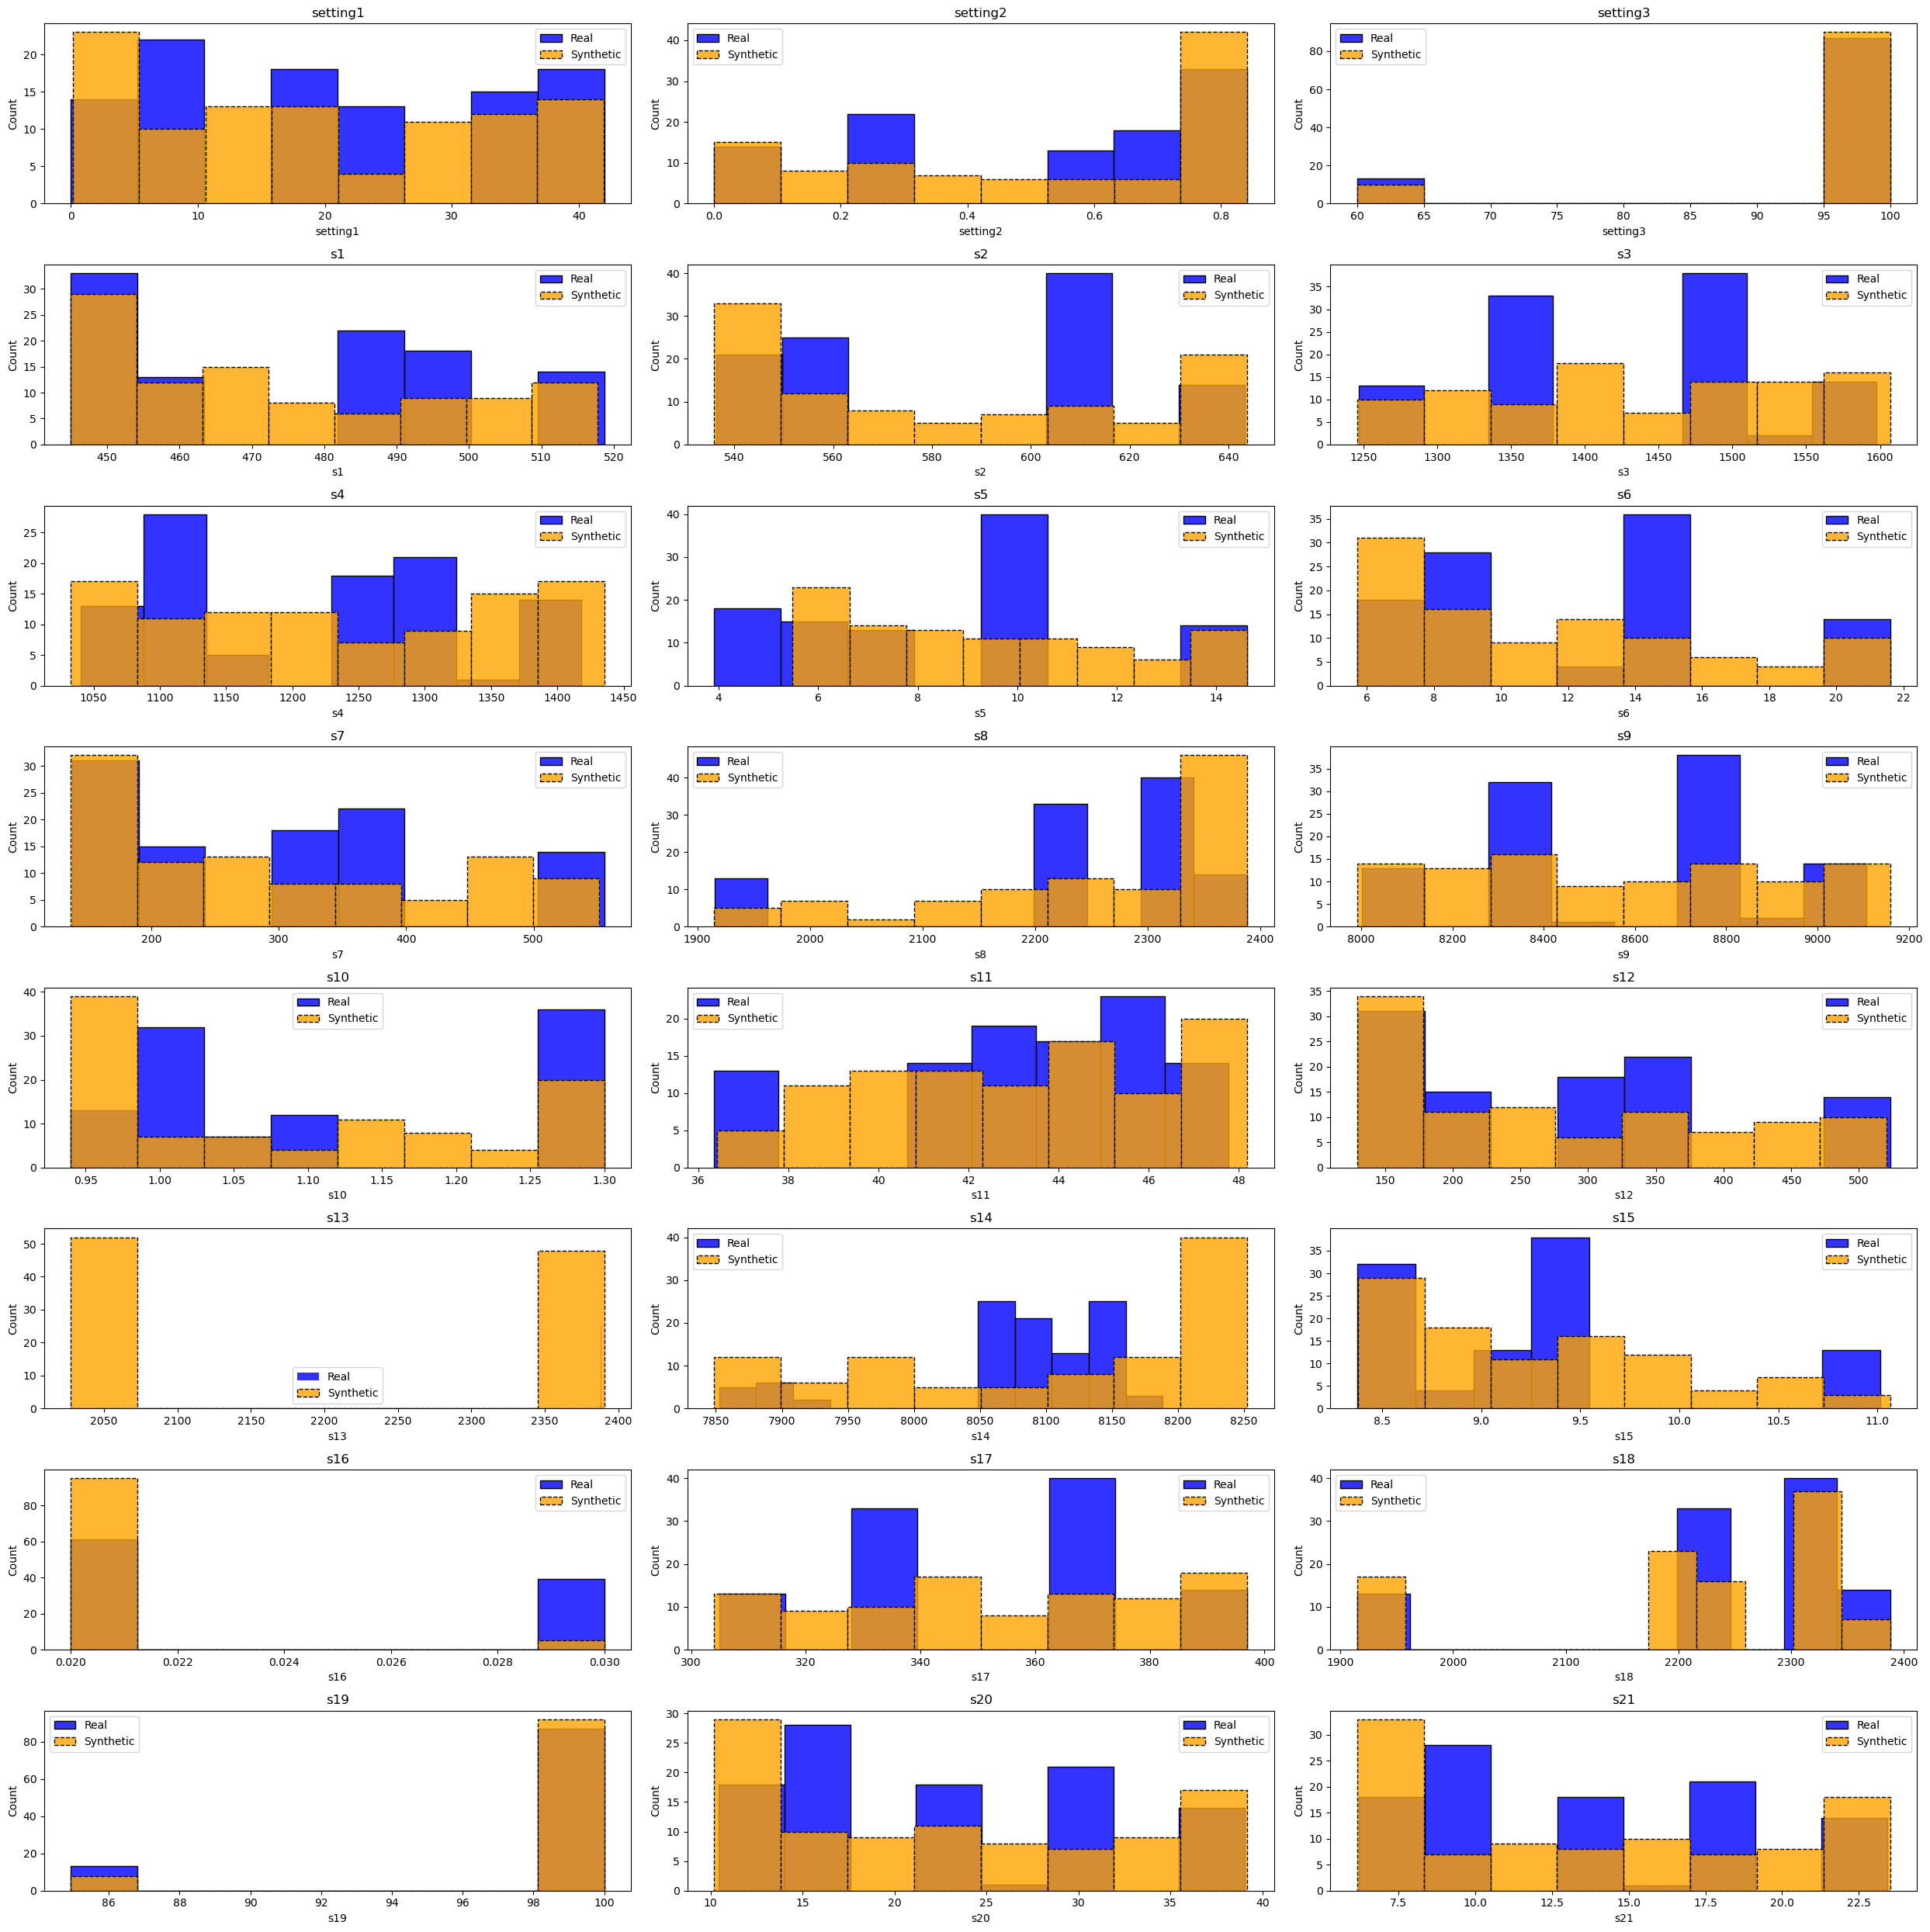

In [18]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

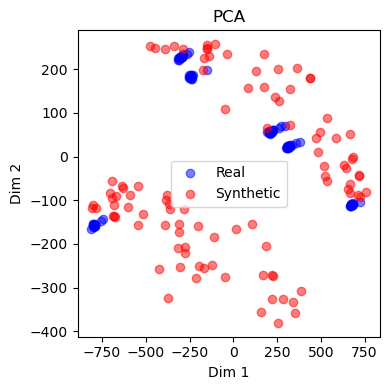

In [19]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

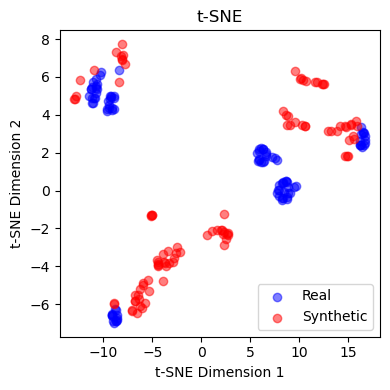

In [20]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)

## Conditional Tabular GAN - CTGAN

Conditional Tabular GAN is a specialized version of GAN designed specifically for generating tabular data. It specifically addresses challenges where the tabular data has a mix of categorical values and continuous values. It also supports conditional sampling allowing to sample values with specific values (e.g. Gender = 'F').
The conditional generator takes conditional vector for categorical values and generates synthetic rows that meets the condition. Discriminator (critic) estimates the distance between conditional distributions of original and generated data. For continuous variables it can handle multi-modal non Gaussian distributions. It detects the number of modes in the marginal distributions with variational Gaussian mixture model (VGM), computes probability distributions of each mode and normalize to respective modes. The values are represented as a combination of one-hot vecotr identifying the mode and parameters of the distribution.

<img src="images/CTGAN.png" width="600" align="left"/>



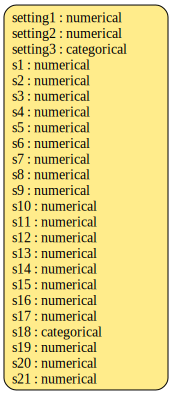

In [22]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata.visualize()

In [23]:
from sdv.single_table import CTGANSynthesizer
ctgan_synthesizer = CTGANSynthesizer(metadata)
ctgan_synthesizer.fit(df)

/opt/conda/lib/python3.10/site-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [24]:
%%time
# Generate synthetic data
sample_size = 100
synthetic_data = ctgan_synthesizer.sample(sample_size).to_numpy()

synthetic_df = pd.DataFrame(synthetic_data, columns=reqd_cols)
synthetic_df

CPU times: user 295 ms, sys: 0 ns, total: 295 ms
Wall time: 133 ms


setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0     9.9687    0.2467     100.0  489.12  604.12  1499.60  1309.47  10.55   
1    20.1776    0.6959     100.0  490.33  606.93  1352.91  1258.36   9.35   
2    42.0080    0.8391     100.0  445.05  549.91  1351.09  1126.64   3.91   
3    20.2991    0.6993     100.0  490.64  607.91  1485.15  1248.30   9.35   
4    10.1173    0.2477     100.0  489.35  605.32  1508.71  1311.52  10.52   
..       ...       ...       ...     ...     ...      ...      ...    ...   
95   35.1288    0.8379     100.0  449.65  556.06  1363.33  1125.85   5.47   
96   25.2178    0.6193      60.0  463.01  537.42  1261.51  1043.43   7.05   
97   24.9100    0.6244      60.0  462.12  537.27  1260.56  1040.29   7.05   
98   42.0080    0.8415     100.0  445.00  549.94  1353.97  1120.43   3.94   
99   24.8914    0.6155      60.0  462.40  537.17  1262.98  1047.11   7.04   

       s6      s7  ...     s12      s13      s14      s15   s16    s17  \
0   15.51  394.95  ...  371.95  2388.22  8134.10   8.6689  0.03  371.0   
1   13.70  332.01  ...  315.24  2388.57  8057.12   9.2021  0.02  368.0   
2    5.71  138.89  ...  132.10  2387.76  8088.10   9.4095  0.02  330.0   
3   13.64  336.32  ...  313.21  2388.22  8079.70   9.3187  0.02  364.0   
4   15.58  395.55  ...  371.67  2386.73  8142.29   8.6590  0.03  369.0   
..    ...     ...  ...     ...      ...      ...      ...   ...    ...   
95   8.00  194.65  ...  182.85  2388.41  8056.29   9.3561  0.02  333.0   
96   9.03  172.02  ...  164.93  2028.39  7872.70  10.8829  0.02  306.0   
97   9.03  175.65  ...  163.84  2030.84  7872.52  10.8307  0.02  306.0   
98   5.76  136.99  ...  131.87  2388.42  8097.30   9.3777  0.02  331.0   
99   9.04  174.36  ...  164.99  2029.92  7875.32  10.8641  0.02  307.0   

       s18     s19    s20      s21  
0   2319.0  100.00  28.63  17.2118  
1   2324.0  100.00  24.52  14.7191  
2   2212.0  100.00  10.67   6.3977  
3   2324.0  100.00  24.52  14.7080  
4   2319.0   99.99  28.52  17.1044  
..     ...     ...    ...      ...  
95  2223.0  100.00  14.99   8.8479  
96  1915.0   84.93  14.51   8.6937  
97  1915.0   85.17  14.43   8.7385  
98  2212.0  100.00  10.69   6.2428  
99  1915.0   84.93  14.31   8.6811  

[100 rows x 24 columns]

In [25]:
algo_name = 'ctgan'

In [37]:
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'
synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 

In [26]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


Min        Max         Mean         Std
setting1     0.0000    42.0080    21.863409   14.095098
setting2     0.0000     0.8419     0.539277    0.307351
setting3    60.0000   100.0000    94.800000   13.452137
s1         445.0000   518.6700   476.265200   25.222571
s2         536.3100   643.2700   584.522100   36.014661
s3        1247.0600  1597.7700  1433.442300  102.663913
s4        1040.5100  1418.2100  1220.112700  115.103377
s5           3.9100    14.6200     8.486500    3.421230
s6           5.7100    21.6100    12.294100    5.165116
s7         137.9500   555.4200   301.459000  139.818840
s8        1915.1000  2388.2000  2243.457400  139.901365
s9        8001.7000  9107.0200  8570.571700  325.164306
s10          0.9400     1.3000     1.111900    0.128908
s11         36.3500    47.7800    43.326000    3.115025
s12        130.1000   523.1800   283.832800  131.869406
s13       2027.9300  2389.6500  2341.361200  120.961806
s14       7852.4400  8188.4900  8075.391200   81.441890
s15          8.3737    11.0145     9.257105    0.740894
s16          0.0200     0.0300     0.023900    0.004877
s17        305.0000   397.0000   351.950000   26.693585
s18       1915.0000  2388.0000  2243.380000  140.049833
s19         84.9300   100.0000    98.040900    5.068093
s20         10.4400    39.0400    22.088500    9.446593
s21          6.2058    23.4341    13.267902    5.669591


Synthetic stat


Min        Max         Mean         Std
setting1     0.0000    42.0080    23.556849   12.903639
setting2     0.0000     0.8420     0.573948    0.283755
setting3    60.0000   100.0000    87.600000   18.499730
s1         445.0000   518.6700   471.777200   24.412754
s2         535.9000   644.1300   572.055100   37.659809
s3        1256.6400  1599.5800  1392.436300  114.116443
s4        1039.5600  1415.1800  1177.638000  127.909980
s5           3.9100    14.6200     7.868200    3.144132
s6           5.7100    21.6100    11.373900    5.034544
s7         136.9900   555.5600   267.192200  136.215288
s8        1914.7700  2388.3400  2169.924200  178.245893
s9        7994.6200  9079.3000  8419.660500  356.677998
s10          0.9400     1.3000     1.063900    0.129398
s11         36.6400    48.0300    41.843500    3.791974
s12        129.4500   523.0700   255.215500  130.968490
s13       2027.6100  2389.1900  2277.132800  165.693012
s14       7867.9700  8150.9400  8029.663800  105.132349
s15          8.3946    10.9943     9.615717    0.912718
s16          0.0200     0.0300     0.022700    0.004440
s17        305.0000   395.0000   340.700000   30.062435
s18       1915.0000  2388.0000  2170.700000  179.988805
s19         84.9300   100.0000    95.347600    6.938935
s20         10.5600    39.2400    20.344100    9.435201
s21          6.2428    23.5901    11.783209    5.364595


Comparison:


KLD Mean    WD Mean
Comparison  0.199364  22.397524

In [27]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 0.014505445957183838},
 {'setting2': 0.012352995574474335},
 {'setting3': 0.268809050321579},
 {'s1': 0.01671425998210907},
 {'s2': 0.06137216091156006},
 {'s3': 0.09098780155181885},
 {'s4': 0.07936035841703415},
 {'s5': 0.022915944457054138},
 {'s6': 0.016355764120817184},
 {'s7': 0.030401816591620445},
 {'s8': 0.2061672806739807},
 {'s9': 0.1157306358218193},
 {'s10': 0.0686464011669159},
 {'s11': 0.15639802813529968},
 {'s12': 0.023358546197414398},
 {'s13': 0.2630688548088074},
 {'s14': 0.23391598463058472},
 {'s15': 0.16620635986328125},
 {'s16': 0.03828120231628418},
 {'s17': 0.10323695093393326},
 {'s18': 0.20825538039207458},
 {'s19': 0.2628822922706604},
 {'s20': 0.016880417242646217},
 {'s21': 0.036892957985401154}]

In [28]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.24, 0.0061340334218580265)},
 {'setting2': (0.24, 0.0061340334218580265)},
 {'setting3': (0.18, 0.07822115797841851)},
 {'s1': (0.22, 0.015577131622877688)},
 {'s2': (0.22, 0.015577131622877688)},
 {'s3': (0.25, 0.0037294923618311367)},
 {'s4': (0.24, 0.0061340334218580265)},
 {'s5': (0.23, 0.009878183186176536)},
 {'s6': (0.2, 0.03638428787491733)},
 {'s7': (0.19, 0.05390207893129876)},
 {'s8': (0.23, 0.009878183186176536)},
 {'s9': (0.25, 0.0037294923618311367)},
 {'s10': (0.2, 0.03638428787491733)},
 {'s11': (0.24, 0.0061340334218580265)},
 {'s12': (0.17, 0.11119526053829192)},
 {'s13': (0.31, 0.00012016164291946694)},
 {'s14': (0.21, 0.024055802841094577)},
 {'s15': (0.22, 0.015577131622877688)},
 {'s16': (0.12, 0.469506448503778)},
 {'s17': (0.23, 0.009878183186176536)},
 {'s18': (0.18, 0.07822115797841851)},
 {'s19': (0.28, 0.0007377026282063397)},
 {'s20': (0.17, 0.11119526053829192)},
 {'s21': (0.2, 0.03638428787491733)}]

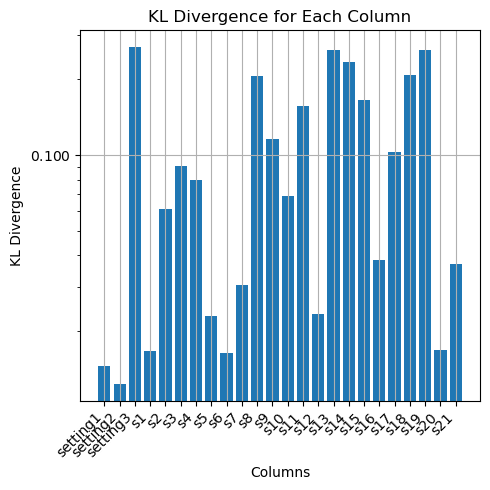

In [29]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

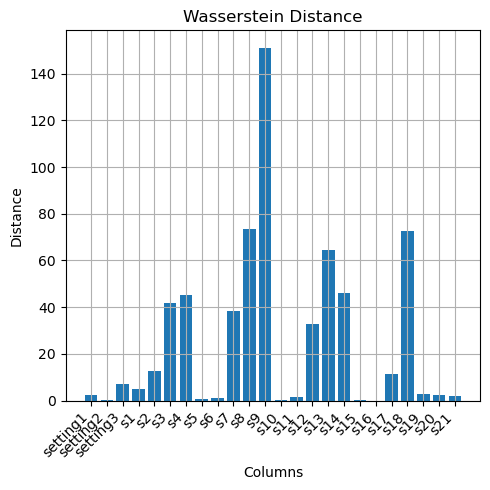

In [30]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

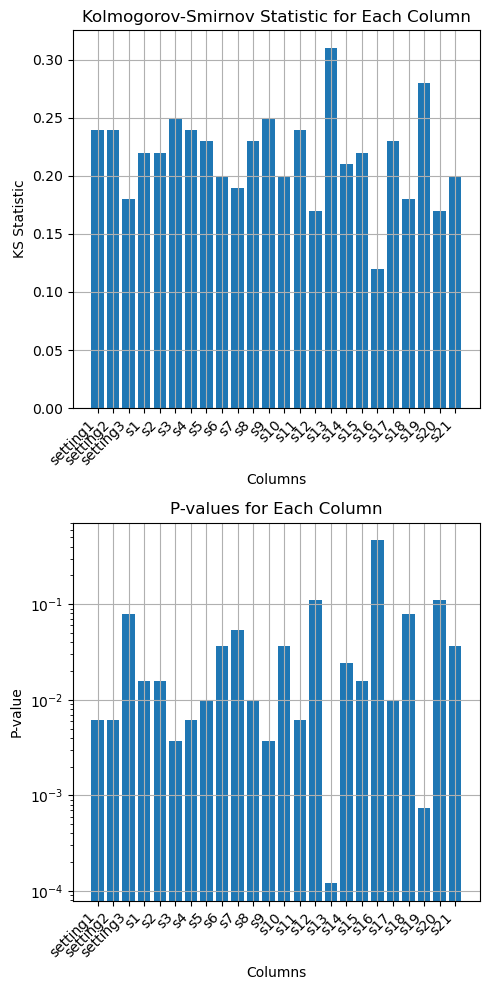

In [31]:
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

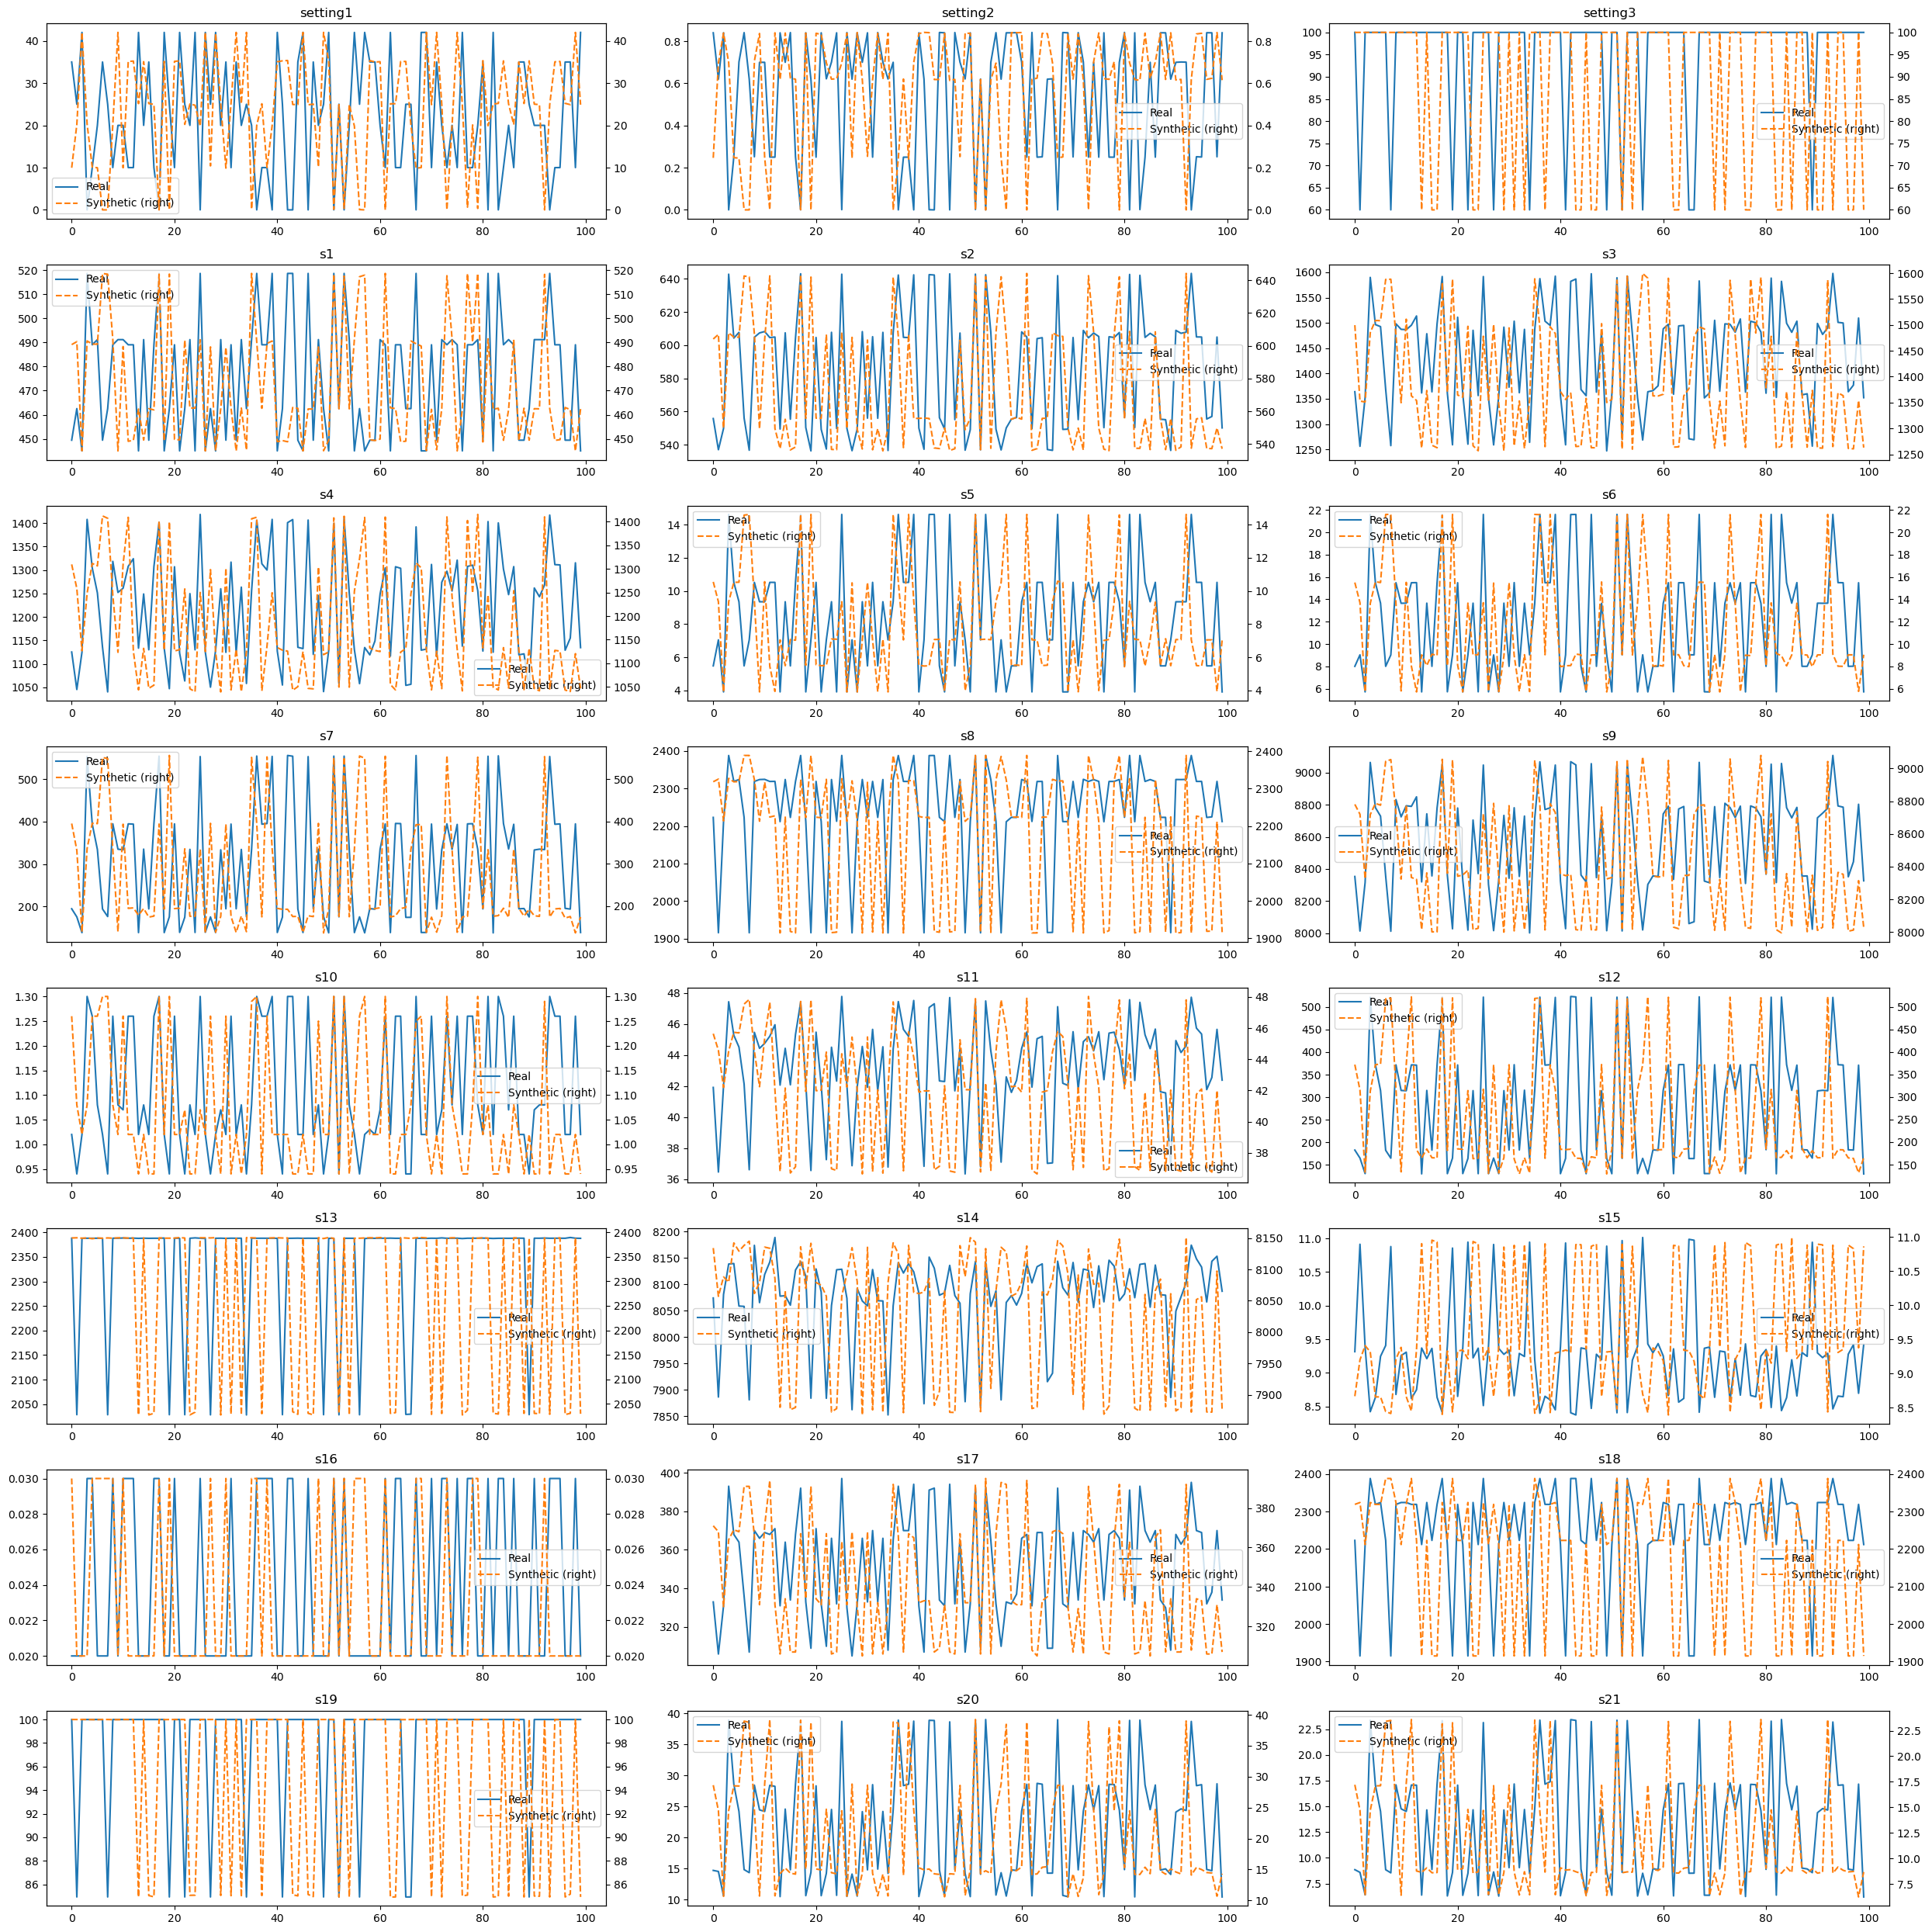

In [32]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

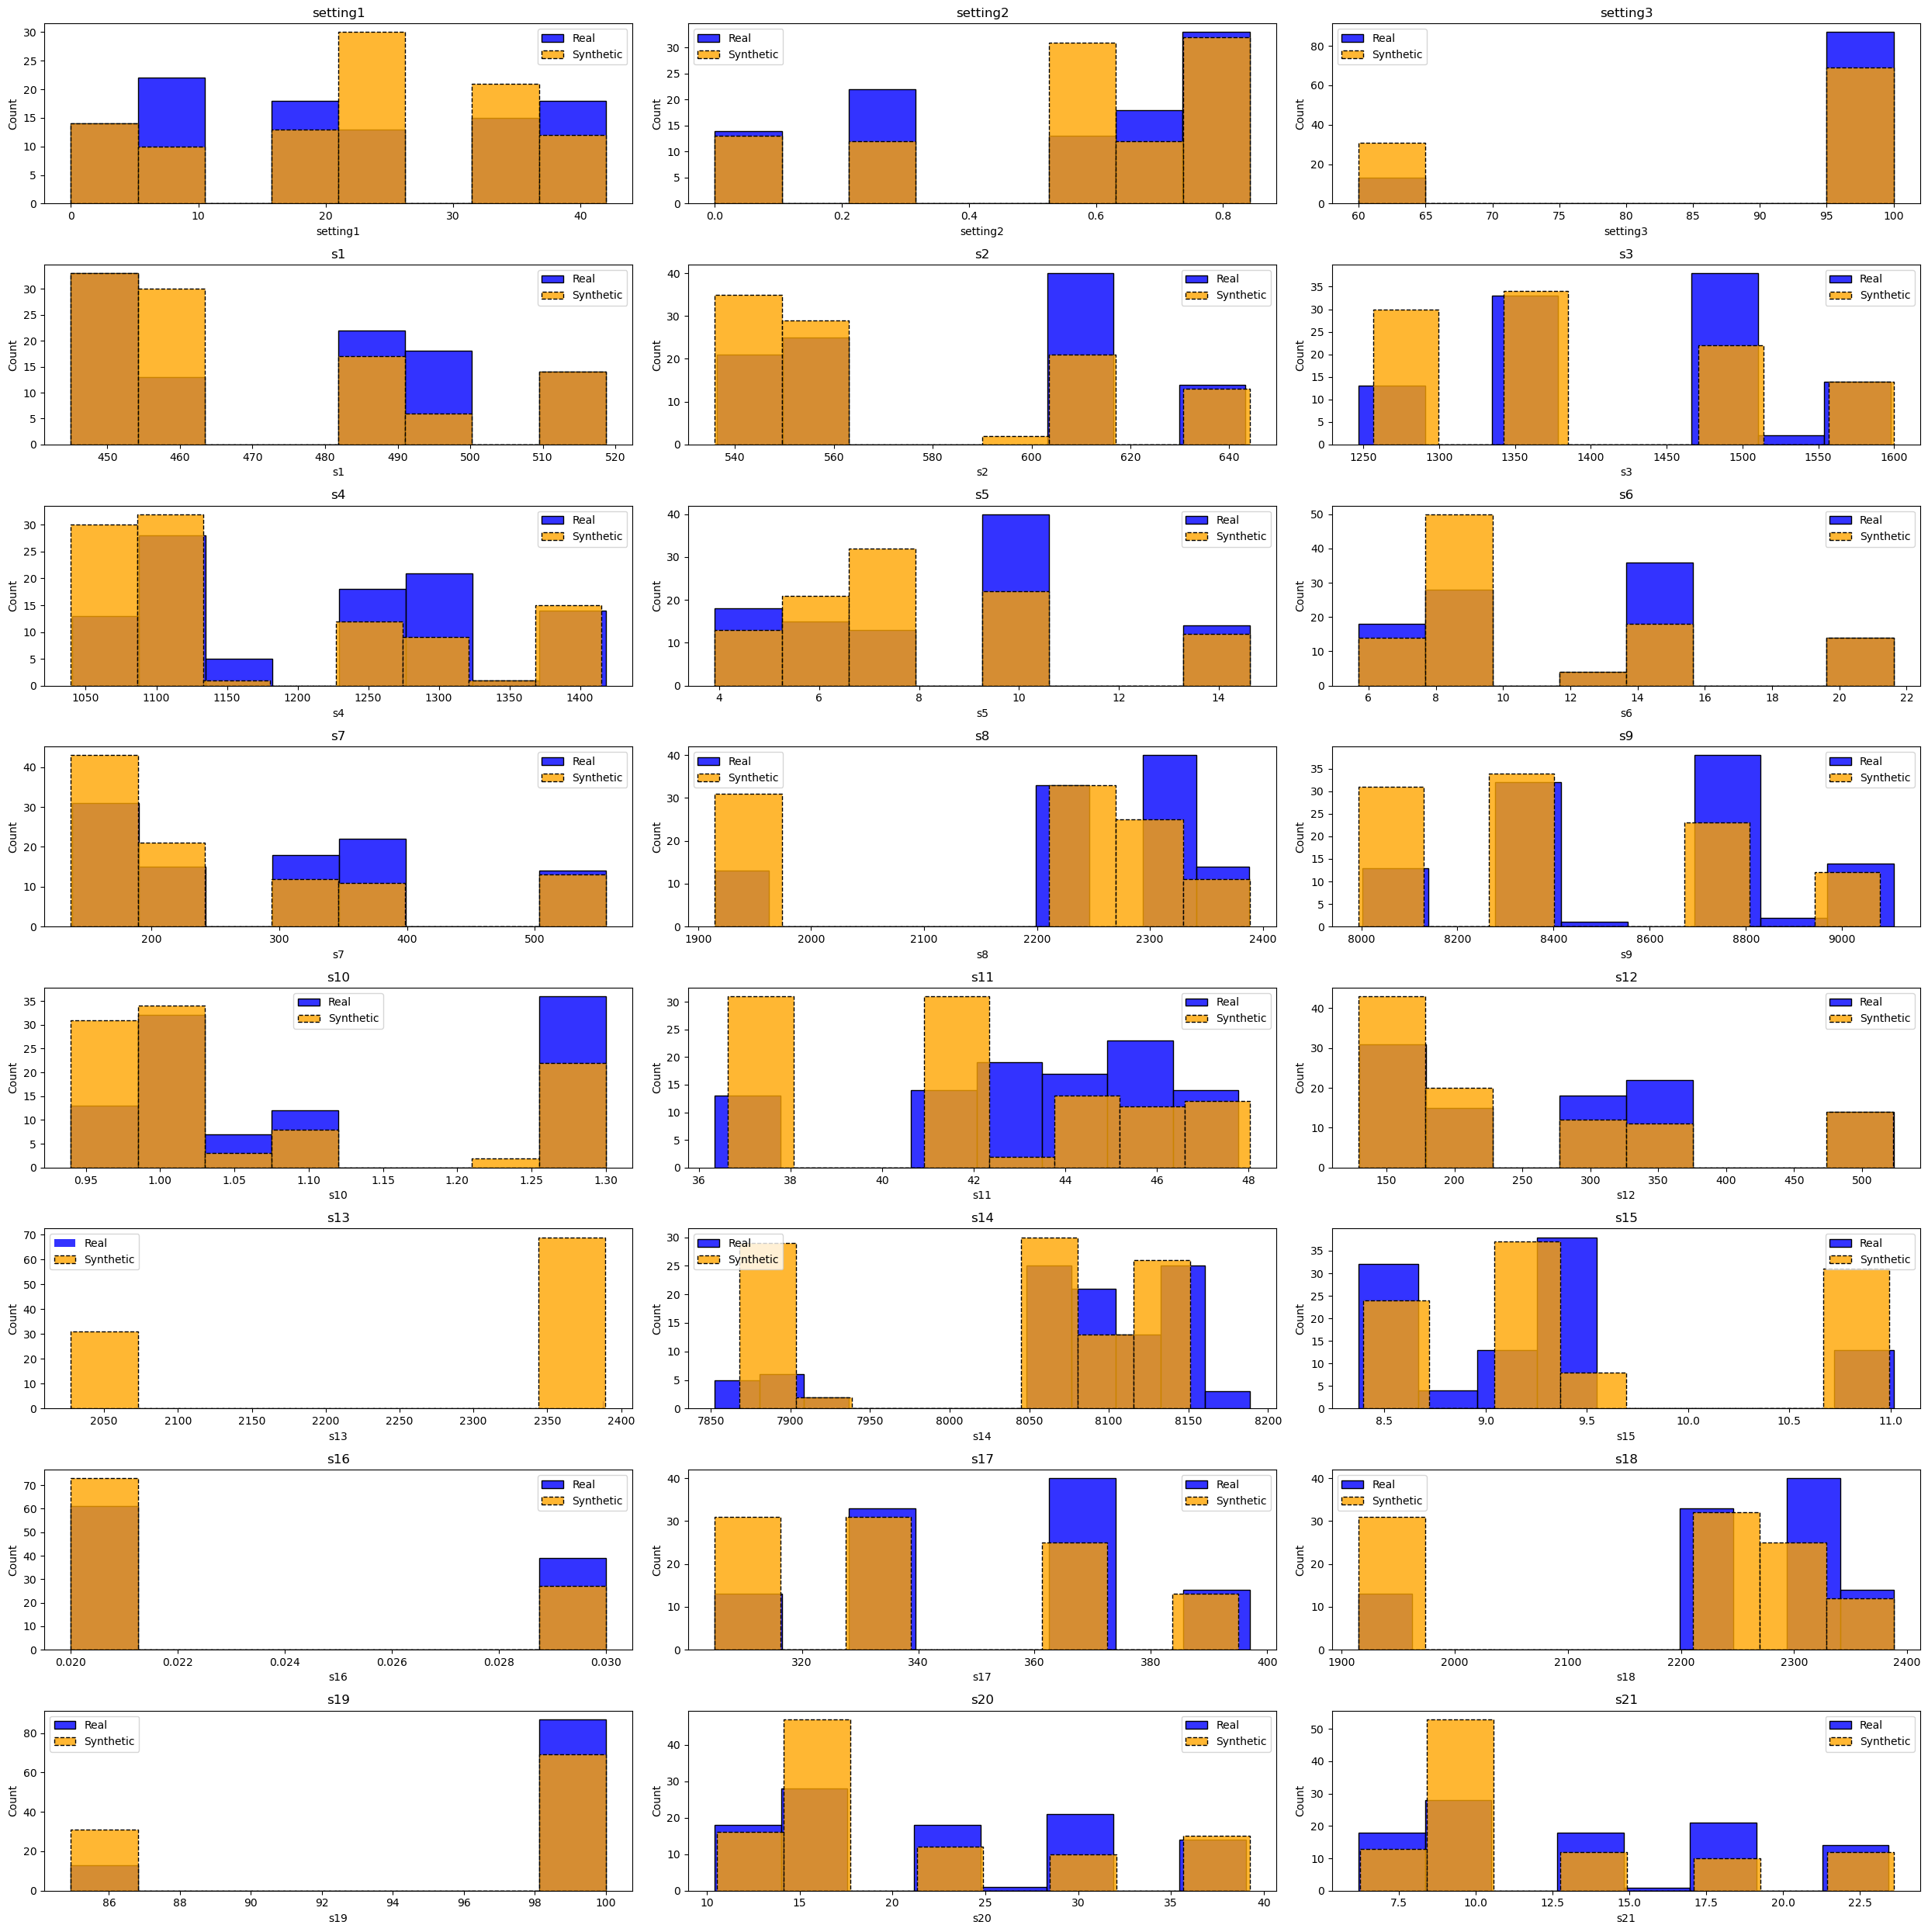

In [33]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

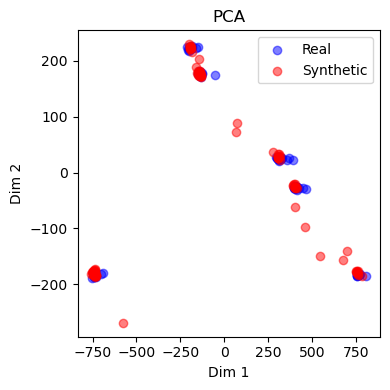

In [34]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

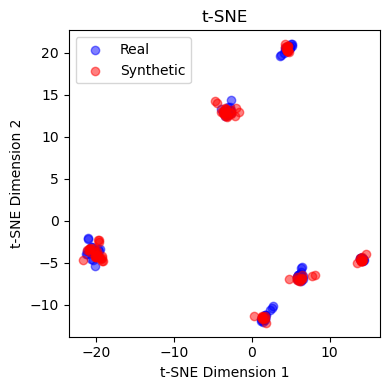

In [35]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)